# 📊 Data Loading and Exploration

Welcome to your first quantitative trading notebook! This notebook will help you:

1. **Load your MT5 CSV data** into Python
2. **Explore and understand** your data
3. **Validate data quality**
4. **Create sample data** for testing

Let's start by importing the necessary libraries and loading some data!

## Step 1: Import Libraries

First, let's import all the libraries we'll need for data analysis.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import our custom modules
import sys
project_root = str(Path.cwd().parent)
sys.path.append(project_root)
from utils.data_loader import load_mt5_csv, validate_data, get_data_summary, load_sample_data

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ All libraries imported successfully!")

## Step 2: Create Sample Data

Since you might not have your MT5 data ready yet, let's create some sample EURUSD data to work with. This will help you understand how the system works.

In [ ]:
# Create sample EURUSD 5-minute data
print("🚀 Creating sample EURUSD 5-minute data...")

sample_data = load_sample_data()

print(f"✅ Sample data created successfully!")
print(f"📊 Data shape: {sample_data.shape}")
print(f"📅 Date range: {sample_data.index.min()} to {sample_data.index.max()}")
print(f"💰 Price range: {sample_data['low'].min():.5f} to {sample_data['high'].max():.5f}")

## Step 3: Explore Your Data

Let's take a closer look at what our data looks like:

In [2]:
# Display first few rows
print("📋 First 5 rows of data:")
display(sample_data.head())

print("\n📋 Last 5 rows of data:")
display(sample_data.tail())

In [ ]:
# Get basic statistics
print("📈 Basic Statistics:")
display(sample_data.describe())

## Step 4: Data Validation

Let's check if our data is valid and ready for analysis:

In [ ]:
# Validate the data
print("🔍 Validating data...")

is_valid = validate_data(sample_data)
print(f"✅ Data validation: {'PASS' if is_valid else 'FAIL'}")

# Get detailed summary
summary = get_data_summary(sample_data)
print("\n📋 Data Summary:")
for key, value in summary.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for subkey, subvalue in value.items():
            print(f"    {subkey}: {subvalue}")
    else:
        print(f"  {key}: {value}")

## Step 5: Visualize Your Data

Let's create some basic charts to understand our data better:

In [ ]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('EURUSD Data Analysis', fontsize=16)

# 1. Price movement over time
axes[0, 0].plot(sample_data.index, sample_data['close'], label='Close Price', color='blue', linewidth=1)
axes[0, 0].set_title('EURUSD Close Price Over Time')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. OHLC chart (simplified)
sample_subset = sample_data.head(50)  # Just first 50 points for clarity
x = range(len(sample_subset))
axes[0, 1].vlines(x, sample_subset['low'], sample_subset['high'], color='black')
axes[0, 1].vlines(x, sample_subset['open'], sample_subset['close'], 
                color=['green' if close > open else 'red' for open, close in 
                       zip(sample_subset['open'], sample_subset['close'])], linewidth=3)
axes[0, 1].set_title('OHLC Chart (First 50 Candles)')
axes[0, 1].set_ylabel('Price')
axes[0, 1].grid(True, alpha=0.3)

# 3. Price distribution
axes[1, 0].hist(sample_data['close'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Close Price Distribution')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Daily returns
returns = sample_data['close'].pct_change().dropna()
axes[1, 1].hist(returns, bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Daily Returns Distribution')
axes[1, 1].set_xlabel('Returns')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Load Your MT5 Data

Great news! You already have your M5 CSV historical data in the `data/raw/` folder. Let's load it now!

In [27]:
# List available files in data/raw/ folder
import os
import sys

# 1) Add project root (parent of 'notebooks') to sys.path
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# 2) Import using package-like path
from utils.data_loader import load_mt5_csv, validate_data, get_data_summary
from pathlib import Path
raw_data_path = Path("data/raw/")
if raw_data_path.exists():
    print(os.listdir(raw_data_path))
    files = list(raw_data_path.glob("*.csv"))
    print(f"📁 Found {len(files)} CSV files in data/raw/:")
    for i, file in enumerate(files, 1):
        print(f"   {i}. {file.name}")
    
    if files:
        # Load the first CSV file found
        mt5_file_path = str(files[0])
        print(f"\n🚀 Loading MT5 data from: {mt5_file_path}")
        
        # Load the data
        mt5_data = load_mt5_csv(mt5_file_path)
        
        # Validate the data
        is_valid = validate_data(mt5_data)
        print(f"✅ MT5 data validation: {'PASS' if is_valid else 'FAIL'}")
        
        # Display summary
        summary = get_data_summary(mt5_data)
        print(f"\n📊 MT5 Data Summary:")
        print(f"   Total rows: {summary['total_rows']}")
        print(f"   Date range: {summary['date_range']['start']} to {summary['date_range']['end']}")
        print(f"   Price range: {summary['price_range']['min']:.5f} to {summary['price_range']['max']:.5f}")
        
        # Show first few rows
        print(f"\n📋 First 5 rows:")
        display(mt5_data.head())
        
    else:
        print("❌ No CSV files found in data/raw/ folder")
        print("📝 Using sample data instead")
        #mt5_data = sample_data  # Use sample data as fallback
else:
    print("❌ data/raw/ folder not found")
    print("📝 Using sample data instead")
    #mt5_data = sample_data  # Use sample data as fallback

INFO:utils.data_loader:Loading MT5 CSV file: data\raw\EURUSD_M5_202501020200_202509291100.csv
INFO:utils.data_loader:Successfully loaded 55390 rows of data
INFO:utils.data_loader:Date range: 2025-01-02 02:00:00+00:00 to 2025-09-29 11:00:00+00:00


['EURUSD_M5_202501020200_202509291100.csv']
📁 Found 1 CSV files in data/raw/:
   1. EURUSD_M5_202501020200_202509291100.csv

🚀 Loading MT5 data from: data\raw\EURUSD_M5_202501020200_202509291100.csv
✅ MT5 data validation: PASS

📊 MT5 Data Summary:
   Total rows: 55390
   Date range: 2025-01-02 02:00:00 to 2025-09-29 11:00:00
   Price range: 1.01778 to 1.19189

📋 First 5 rows:


,open,high,low,close
datetime,,,,
2025-01-02 02:00:00+00:00,1.03507,1.03514,1.03493,1.03498
2025-01-02 02:05:00+00:00,1.03497,1.03517,1.03497,1.03515
2025-01-02 02:10:00+00:00,1.03515,1.03519,1.03492,1.03496
2025-01-02 02:15:00+00:00,1.03497,1.03504,1.03478,1.03493
2025-01-02 02:20:00+00:00,1.03490,1.03517,1.03476,1.03501


## Step 7: Advanced Data Analysis

Let's dive deeper into the data characteristics:

In [28]:
# Calculate additional metrics
data = mt5_data

print("📈 Advanced Data Analysis")
print("=" * 40)

# Price statistics
print(f"📊 Price Statistics:")
print(f"   Average price: {data['close'].mean():.5f}")
print(f"   Median price: {data['close'].median():.5f}")
print(f"   Price volatility (std): {data['close'].std():.5f}")
print(f"   Price range: {data['close'].max() - data['close'].min():.5f}")

# Returns analysis
returns = data['close'].pct_change().dropna()
print(f"\n💰 Returns Analysis:")
print(f"   Average daily return: {returns.mean():.4%}")
print(f"   Return volatility: {returns.std():.4%}")
print(f"   Best day return: {returns.max():.4%}")
print(f"   Worst day return: {returns.min():.4%}")

# Trend analysis
trend_direction = "Upward" if data['close'].iloc[-1] > data['close'].iloc[0] else "Downward"
total_return = (data['close'].iloc[-1] - data['close'].iloc[0]) / data['close'].iloc[0]
print(f"\n📈 Trend Analysis:")
print(f"   Overall trend: {trend_direction}")
print(f"   Total return: {total_return:.4%}")
print(f"   Number of up days: {sum(returns > 0)}")
print(f"   Number of down days: {sum(returns < 0)}")

📈 Advanced Data Analysis
📊 Price Statistics:
   Average price: 1.11878
   Median price: 1.13631
   Price volatility (std): 0.05154
   Price range: 0.17270

💰 Returns Analysis:
   Average daily return: 0.0002%
   Return volatility: 0.0340%
   Best day return: 0.9951%
   Worst day return: -1.1324%

📈 Trend Analysis:
   Overall trend: Upward
   Total return: 13.2862%
   Number of up days: 27394
   Number of down days: 26819


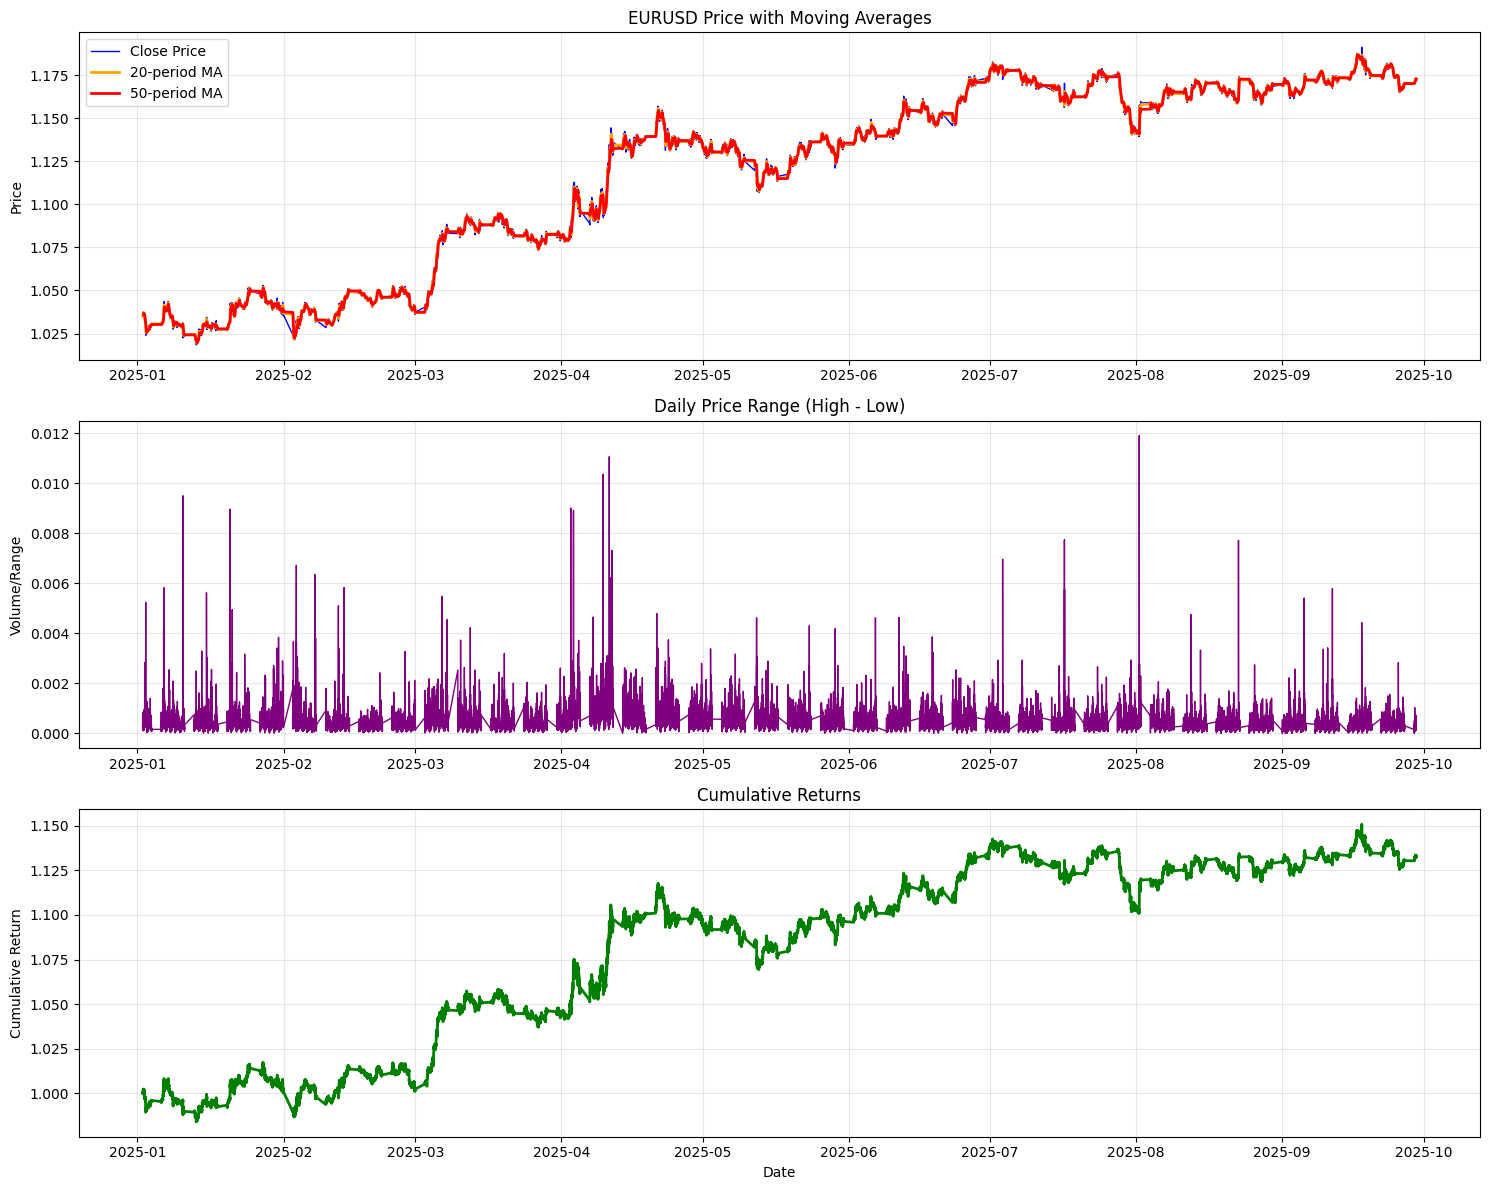

In [31]:
import matplotlib.pyplot as plt
# Visualize the data with more detail
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Price with moving averages
axes[0].plot(data.index, data['close'], label='Close Price', color='blue', linewidth=1)
axes[0].plot(data.index, data['close'].rolling(window=20).mean(), label='20-period MA', color='orange', linewidth=2)
axes[0].plot(data.index, data['close'].rolling(window=50).mean(), label='50-period MA', color='red', linewidth=2)
axes[0].set_title('EURUSD Price with Moving Averages')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Volume (if available) or price range
if 'volume' in data.columns:
    axes[1].bar(data.index, data['volume'], alpha=0.7, color='gray')
    axes[1].set_title('Volume')
else:
    price_range = data['high'] - data['low']
    axes[1].plot(data.index, price_range, color='purple', linewidth=1)
    axes[1].set_title('Daily Price Range (High - Low)')
axes[1].set_ylabel('Volume/Range')
axes[1].grid(True, alpha=0.3)

# 3. Cumulative returns
cumulative_returns = (1 + returns).cumprod()
axes[2].plot(data.index[1:], cumulative_returns, color='green', linewidth=2)
axes[2].set_title('Cumulative Returns')
axes[2].set_ylabel('Cumulative Return')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Data Quality Check

Let's perform a comprehensive data quality check:

In [32]:
print("🔍 Data Quality Check")
print("=" * 30)

data = mt5_data

# Check for missing values
missing_values = data.isnull().sum()
print(f"❌ Missing values per column:")
for col, count in missing_values.items():
    print(f"   {col}: {count}")

# Check for duplicates
duplicates = data.index.duplicated().sum()
print(f"\n❌ Duplicate timestamps: {duplicates}")

# Check OHLC consistency
invalid_high = ((data['high'] < data['open']) | (data['high'] < data['close'])).sum()
invalid_low = ((data['low'] > data['open']) | (data['low'] > data['close'])).sum()
print(f"\n❌ OHLC consistency issues:")
print(f"   Invalid high values: {invalid_high}")
print(f"   Invalid low values: {invalid_low}")

# Check for zero volume (if volume column exists)
if 'volume' in data.columns:
    zero_volume = (data['volume'] == 0).sum()
    print(f"   Zero volume periods: {zero_volume}")

# Check data frequency
time_diffs = data.index.to_series().diff().dropna()
unique_freq = time_diffs.value_counts().head(3)
print(f"\n⏰ Data frequency check:")
print(f"   Most common intervals:")
for freq, count in unique_freq.items():
    print(f"     {freq}: {count} occurrences")

🔍 Data Quality Check
❌ Missing values per column:
   open: 0
   high: 0
   low: 0
   close: 0

❌ Duplicate timestamps: 0

❌ OHLC consistency issues:
   Invalid high values: 0
   Invalid low values: 0

⏰ Data frequency check:
   Most common intervals:
     0 days 00:05:00: 55341 occurrences
     2 days 00:05:00: 39 occurrences
     0 days 00:10:00: 6 occurrences


## 🎯 Summary

Great job! You've successfully:

✅ **Loaded and explored** your trading data
✅ **Validated data quality** and identified any issues
✅ **Created visualizations** to understand price patterns
✅ **Analyzed returns** and trends
✅ **Checked data consistency** and frequency

### What's Next?

Now that you have your data ready, you can:

1. **Move to Notebook 02**: Test Moving Average strategies
2. **Experiment with parameters**: Try different time periods
3. **Add more data**: Load data for different timeframes or assets
4. **Customize visualizations**: Create your own charts

### Key Takeaways

- **Data quality is crucial**: Always validate your data before analysis
- **Understanding your data**: Visualizations help identify patterns and anomalies
- **Consistent format**: MT5 CSV files have a specific structure that we can work with
- **Sample data is useful**: Great for testing and learning before using real data

You're now ready to start building and testing trading strategies! 🚀